In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from glob import glob
from descriptors.sf.get_sf_param import get_sf_radial_params

In [2]:
path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/atom6750/0deg_100eV'

dump_files = glob(f'{path2root}/data.Si.*')
dump_files.sort()

In [3]:
from ase.io import lammpsdata, read
import os

rcut = 6
param_df = get_sf_radial_params(elm=['Si'], rcut=rcut, nb_param_pairs=6)
g2_params = param_df[['eta', 'rs']].values

In [ ]:
from descriptors.sf.get_sf_value import SfFuncVal

dump_file = dump_files[1]
structure = lammpsdata.read_lammps_data(file=dump_file, style='atomic')

In [ ]:
for i, dump_file in enumerate(dump_files):
    structure = lammpsdata.read_lammps_data(file=dump_file, style='atomic')
    symbols = ['Si' for _ in range(structure.get_global_number_of_atoms())]
    structure.set_chemical_symbols(symbols)

    df_sf = SfFuncVal.get_g2_value(
        g2_params=g2_params,
        structure=structure,
        species=['Si', 'Si'],
        rcut=rcut,
        periodic=False
        )

    path2out = '/home/y1u0d2/result/lammps/scripts/Si/sputtering/sw/atom6750/csv/0deg_100eV'
    pickle_filename = f'sf-dump_{i}.pickle'
    df_sf.to_pickle(os.path.join(path2out, pickle_filename))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(data=scaler.fit_transform(df_sf), columns=df_sf.columns)

In [ ]:
df_scaled

In [ ]:
positions = structure.get_positions()
x = positions[:,0]
y = positions[:,1]
z = positions[:,2]

In [ ]:
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
# ax.scatter(y,z)

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
sns.boxplot(data=df_scaled, showfliers=False, ax=ax)
sns.stripplot(data=df_scaled, jitter=True, ax=ax)

In [ ]:
path2data = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/atom6750/data'
# df_sf.to_pickle(f'/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/atom6750/data/sample.pickle')

In [ ]:
# df_sf.to_csv(f'/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/atom6750/data/sample.csv', index=False)

In [ ]:
# df_pickle = pd.read_pickle(os.path.join(path2data, 'sample.pickle'))

In [ ]:
# df_csv = pd.read_csv(os.path.join(path2data, 'sample.csv'))

<AxesSubplot:>

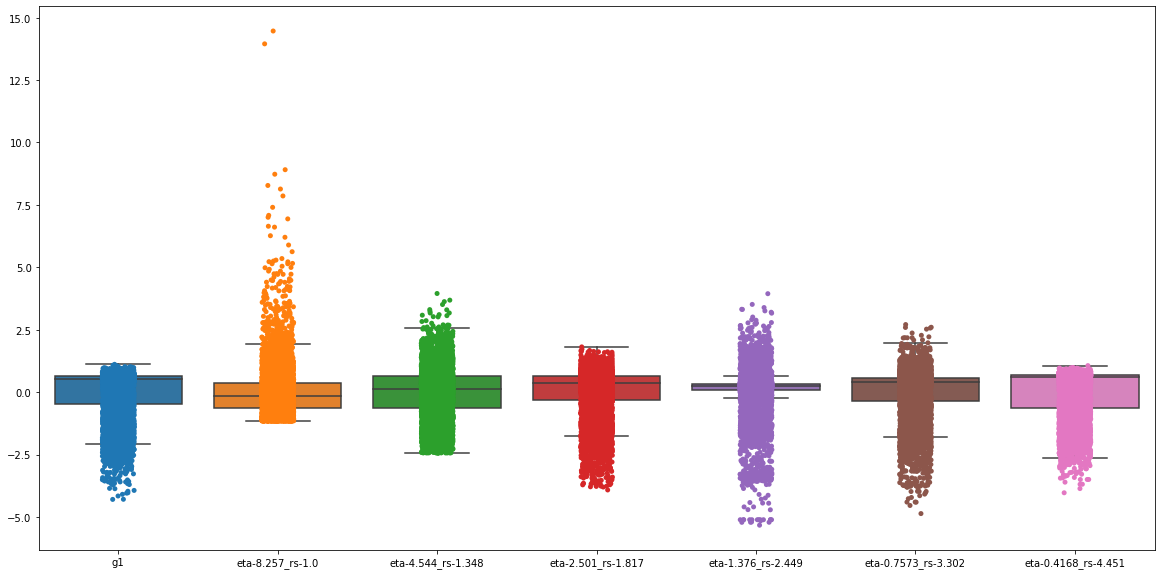

In [74]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
sns.boxplot(data=df_scaled, showfliers=False, ax=ax)
sns.stripplot(data=df_scaled, jitter=True, ax=ax)

In [75]:
path2data = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/atom6750/data'
# df_sf.to_pickle(f'/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/atom6750/data/sample.pickle')

In [76]:
# df_sf.to_csv(f'/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/atom6750/data/sample.csv', index=False)

In [77]:
# df_pickle = pd.read_pickle(os.path.join(path2data, 'sample.pickle'))

In [78]:
# df_csv = pd.read_csv(os.path.join(path2data, 'sample.csv'))